In [3]:
import numpy as np
import pandas as pd


pd.set_option('precision', 2)

# Join
* Join的类型
* Inner join
* Left join
* Right join
* Full join
* 基于多个column的join

## Join的类型

* Inner
* Left
* Right
* Full

### Inner Join

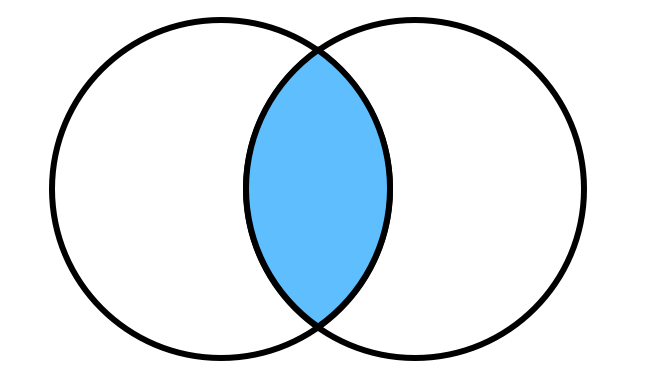

In [2]:
Image(filename='assets/inner-join.png', retina=True)

### Left/Right Join

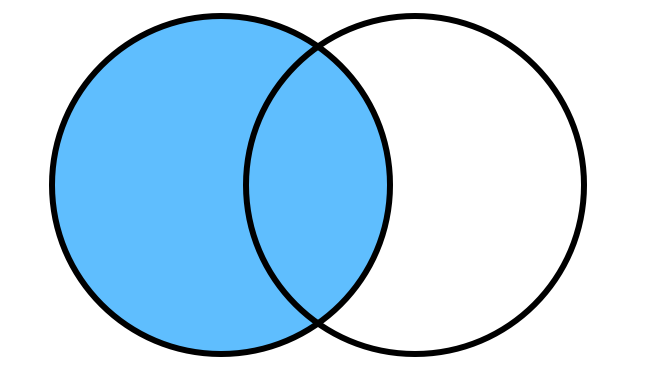

In [3]:
Image(filename='assets/left-join.png', retina=True)

### Full Join

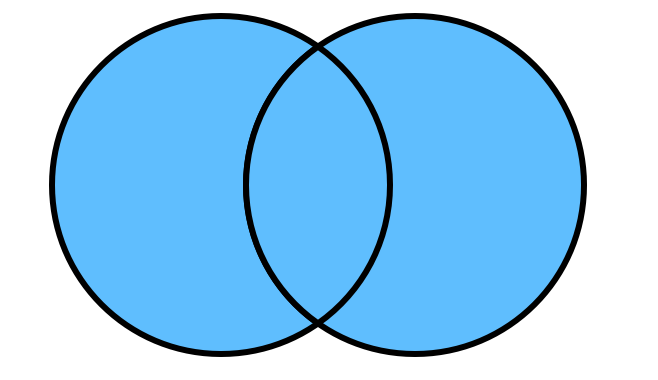

In [4]:
Image(filename='assets/full-join.png', retina=True)

## 创建sample data

In [4]:
math=pd.DataFrame({
    'first name':['ming','tian','hua','hong','yue','sheng'],
    'last name':['zhang','li','zhou','wang','qian','sun'],
    'score':[100,90,30,65,85,77]
})
math

first name last name  score
0       ming     zhang    100
1       tian        li     90
2        hua      zhou     30
3       hong      wang     65
4        yue      qian     85
5      sheng       sun     77

In [5]:
chinese=pd.DataFrame({
    'first name':['ming','tian','hua','hong','zi','lan'],
    'last name':['zhang','li','zhou','wang','zhao','wu'],
    'score':[80,90,45,55,75,100]
})
chinese

first name last name  score
0       ming     zhang     80
1       tian        li     90
2        hua      zhou     45
3       hong      wang     55
4         zi      zhao     75
5        lan        wu    100

## Inner join

In [6]:
pd.merge(math,chinese,on='last name')

first name_x last name  score_x first name_y  score_y
0         ming     zhang      100         ming       80
1         tian        li       90         tian       90
2          hua      zhou       30          hua       45
3         hong      wang       65         hong       55

In [8]:
pd.merge(math,chinese,on='last name',how='inner',suffixes=('_math', '_chinese'))

first name_math last name  score_math first name_chinese  score_chinese
0            ming     zhang         100               ming             80
1            tian        li          90               tian             90
2             hua      zhou          30                hua             45
3            hong      wang          65               hong             55

## Left Join

In [9]:
pd.merge(math,chinese,on='last name',how='left')

first name_x last name  score_x first name_y  score_y
0         ming     zhang      100         ming     80.0
1         tian        li       90         tian     90.0
2          hua      zhou       30          hua     45.0
3         hong      wang       65         hong     55.0
4          yue      qian       85          NaN      NaN
5        sheng       sun       77          NaN      NaN

In [11]:
print(math)
print(chinese)

  first name last name  score
0       ming     zhang    100
1       tian        li     90
2        hua      zhou     30
3       hong      wang     65
4        yue      qian     85
5      sheng       sun     77
  first name last name  score
0       ming     zhang     80
1       tian        li     90
2        hua      zhou     45
3       hong      wang     55
4         zi      zhao     75
5        lan        wu    100


## Right Join

In [13]:
pd.merge(math,chinese,on='last name',how='right',suffixes=('_math', '_chinese'))

first name_math last name  score_math first name_chinese  score_chinese
0            ming     zhang       100.0               ming             80
1            tian        li        90.0               tian             90
2             hua      zhou        30.0                hua             45
3            hong      wang        65.0               hong             55
4             NaN      zhao         NaN                 zi             75
5             NaN        wu         NaN                lan            100

## Outer/Full Join

In [14]:
pd.merge(math,chinese,on='last name',how='outer',suffixes=('_math', '_chinese'))

first name_math last name  score_math first name_chinese  score_chinese
0            ming     zhang       100.0               ming           80.0
1            tian        li        90.0               tian           90.0
2             hua      zhou        30.0                hua           45.0
3            hong      wang        65.0               hong           55.0
4             yue      qian        85.0                NaN            NaN
5           sheng       sun        77.0                NaN            NaN
6             NaN      zhao         NaN                 zi           75.0
7             NaN        wu         NaN                lan          100.0

In [15]:
print(math)
print(chinese)

  first name last name  score
0       ming     zhang    100
1       tian        li     90
2        hua      zhou     30
3       hong      wang     65
4        yue      qian     85
5      sheng       sun     77
  first name last name  score
0       ming     zhang     80
1       tian        li     90
2        hua      zhou     45
3       hong      wang     55
4         zi      zhao     75
5        lan        wu    100


## 基于多column的join
* column名字相同
* column名字不同

### Column名字相同

In [18]:
pd.merge(math,chinese,on=['first name','last name'],how='left',suffixes=('_math', '_chinese'))

first name last name  score_math  score_chinese
0       ming     zhang         100           80.0
1       tian        li          90           90.0
2        hua      zhou          30           45.0
3       hong      wang          65           55.0
4        yue      qian          85            NaN
5      sheng       sun          77            NaN

In [17]:
print(math)
print(chinese)

  first name last name  score
0       ming     zhang    100
1       tian        li     90
2        hua      zhou     30
3       hong      wang     65
4        yue      qian     85
5      sheng       sun     77
  first name last name  score
0       ming     zhang     80
1       tian        li     90
2        hua      zhou     45
3       hong      wang     55
4         zi      zhao     75
5        lan        wu    100


In [19]:
pd.merge(math,chinese,on=['first name','last name'],how='outer',suffixes=('_math', '_chinese'))

first name last name  score_math  score_chinese
0       ming     zhang       100.0           80.0
1       tian        li        90.0           90.0
2        hua      zhou        30.0           45.0
3       hong      wang        65.0           55.0
4        yue      qian        85.0            NaN
5      sheng       sun        77.0            NaN
6         zi      zhao         NaN           75.0
7        lan        wu         NaN          100.0

### Column名字不同

In [21]:
chinese.columns=['first', 'last', 'score']

In [22]:
print(math)
print(chinese)

  first name last name  score
0       ming     zhang    100
1       tian        li     90
2        hua      zhou     30
3       hong      wang     65
4        yue      qian     85
5      sheng       sun     77
  first   last  score
0  ming  zhang     80
1  tian     li     90
2   hua   zhou     45
3  hong   wang     55
4    zi   zhao     75
5   lan     wu    100


In [24]:
pd.merge(math,chinese,how='outer',left_on=['first name','last name'],right_on=['first','last'],suffixes=('_math','_chinese'))

first name last name  score_math first   last  score_chinese
0       ming     zhang       100.0  ming  zhang           80.0
1       tian        li        90.0  tian     li           90.0
2        hua      zhou        30.0   hua   zhou           45.0
3       hong      wang        65.0  hong   wang           55.0
4        yue      qian        85.0   NaN    NaN            NaN
5      sheng       sun        77.0   NaN    NaN            NaN
6        NaN       NaN         NaN    zi   zhao           75.0
7        NaN       NaN         NaN   lan     wu          100.0

## 课后习题

In [70]:
prc = pd.read_csv(
    io.StringIO('ticker,open,date,close\nAAPL,426.23,2018-01-04,435.23\nMSFT,42.3,2018-01-04,51.3\nAAPL,436.23,2018-01-05,\nMSFT,52.3,2018-01-05,\n'),
    parse_dates=['date']
)
prc2 = prc.assign(
    date=pd.to_datetime('2018-01-06'),
    close=prc.open + np.random.randn(len(prc.open))
).drop('open', axis=1)

In [71]:
volume = pd.DataFrame({
    'ticker': ['AAPL', 'MSFT', 'IBM', 'YHOO', 'GOOG'],
    'volume': [1954.73,  335.83,  362.79,  858.18,  629.79]
}).assign(date=pd.to_datetime('2018-01-05'))

**Exercise**

通过`ticker, date` merge `prc` 和 `volume`:

* 保留在 prc 和 volume 中都存在的 `ticker` 和 `date`
* 保留 `prc` 中的所有行
* 保留所有出现在 `prc` 和 `volume` 中的行


In [ ]:
cols = ['ticker', 'date']
pd.merge(prc, volume, on=cols)

In [ ]:
pd.merge(prc, volume, on=cols, how='left')

In [ ]:
pd.merge(prc, volume, on=cols, how='outer')